In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import cv2

In [2]:
from glob import glob
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

In [3]:
image_size = (224,224,3)
train_path = r'../input/tomato/New Plant Diseases Dataset(Augmented)/train'
valid_path = r'../input/tomato/New Plant Diseases Dataset(Augmented)/valid'

In [4]:
inception = InceptionV3(input_shape=image_size,weights='imagenet',include_top=False)

2022-08-17 07:41:37.344974: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 07:41:37.463940: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 07:41:37.465095: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 07:41:37.468872: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 0s 0us/step


In [5]:
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob(r'../input/tomato/New Plant Diseases Dataset(Augmented)/train/*')

In [7]:
folders

['../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite']

In [8]:
len(folders)

10

In [9]:
number_of_classes = 10

model = Sequential()

model.add(inception)

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              52429824  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 74,891,306
Trainable params: 53,088,522
Non-trainable params: 21,802,784
___________________________________

In [10]:
# model.summary()

In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
training_set = train_datagen.flow_from_directory(r'../input/tomato/New Plant Diseases Dataset(Augmented)/train',
target_size=(224,224),
batch_size=16,
class_mode='categorical')

Found 18345 images belonging to 10 classes.


In [14]:
test_set = test_datagen.flow_from_directory(r'../input/tomato/New Plant Diseases Dataset(Augmented)/valid',
target_size=(224,224),
batch_size=16,
class_mode='categorical')

Found 4585 images belonging to 10 classes.


In [15]:
history = model.fit(training_set,validation_data=test_set,epochs=15,steps_per_epoch=len(training_set),validation_steps=len(test_set))

2022-08-17 07:41:53.243614: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-08-17 07:41:58.306418: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1147/1147 [==============================] - 332s 280ms/step - loss: 1.5252 - accuracy: 0.6803 - val_loss: 0.7571 - val_accuracy: 0.7429
Epoch 2/15
1147/1147 [==============================] - 247s 216ms/step - loss: 0.6052 - accuracy: 0.7991 - val_loss: 0.6104 - val_accuracy: 0.7887
Epoch 3/15
1147/1147 [==============================] - 247s 215ms/step - loss: 0.4859 - accuracy: 0.8378 - val_loss: 0.7492 - val_accuracy: 0.7642
Epoch 4/15
1147/1147 [==============================] - 247s 215ms/step - loss: 0.4464 - accuracy: 0.8522 - val_loss: 0.4599 - val_accuracy: 0.8486
Epoch 5/15
1147/1147 [==============================] - 248s 216ms/step - loss: 0.4075 - accuracy: 0.8656 - val_loss: 0.4225 - val_accuracy: 0.8561
Epoch 6/15
1147/1147 [==============================] - 248s 216ms/step - loss: 0.3623 - accuracy: 0.8790 - val_loss: 0.4182 - val_accuracy: 0.8624
Epoch 7/15
1147/1147 [==============================] - 252s 220ms/step - loss: 0.3436 - accuracy: 0.8881 - val_loss: 0.418

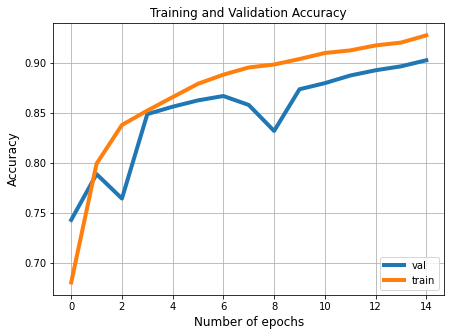

In [16]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_accuracy'],linewidth = 4)
plt.plot(history.history['accuracy'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

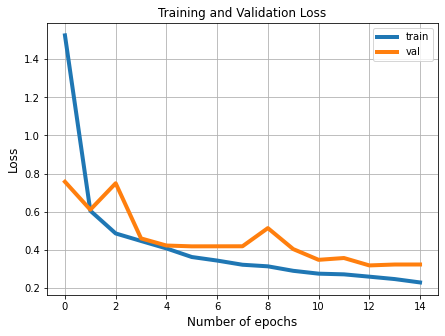

In [17]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()

In [18]:
from PIL import Image
import matplotlib.image as mpimg
import cv2

0
Bacterial Spot


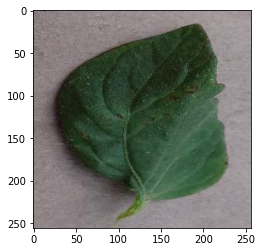

In [19]:
img_test = cv2.imread(r'../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Bacterial_spot/014b58ae-091b-408a-ab4a-5a780cd1c3f3___GCREC_Bact.Sp 2971.JPG')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Bacterial_spot/014b58ae-091b-408a-ab4a-5a780cd1c3f3___GCREC_Bact.Sp 2971.JPG'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)


if input_label == 0:
    print("Bacterial Spot")
elif input_label == 1:
    print("Early Blight")
elif input_label == 2:
    print("Late Blight")
elif input_label == 3:
    print("Leaf Mold")
elif input_label == 4:
    print("Septoria Leaf")
elif input_label == 5:
    print("Spider Mite")
elif input_label == 6:
    print("Target Spot")
elif input_label == 7:
    print("Tomato YellowT")
elif input_label == 8:
    print("Tomato Mosiac Virus")
elif input_label == 9:
    print("Healthy")

1
Early Blight


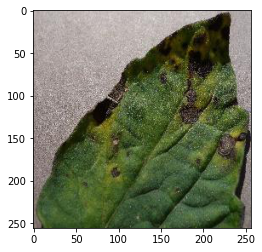

In [20]:
img_test = cv2.imread(r'../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)



if input_label == 0:
    print("Bacterial Spot")
elif input_label == 1:
    print("Early Blight")
elif input_label == 2:
    print("Late Blight")
elif input_label == 3:
    print("Leaf Mold")
elif input_label == 4:
    print("Septoria Leaf")
elif input_label == 5:
    print("Spider Mite")
elif input_label == 6:
    print("Target Spot")
elif input_label == 7:
    print("Tomato YellowT")
elif input_label == 8:
    print("Tomato Mosiac Virus")
elif input_label == 9:
    print("Healthy")

1
Early Blight


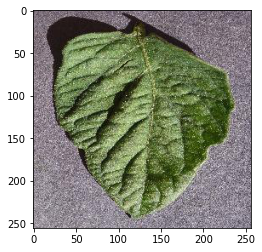

In [21]:

img_test = cv2.imread(r'../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___healthy/00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223_flipTB.JPG')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___healthy/00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223_flipTB.JPG'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)



if input_label == 0:
    print("Bacterial Spot")
elif input_label == 1:
    print("Early Blight")
elif input_label == 2:
    print("Late Blight")
elif input_label == 3:
    print("Leaf Mold")
elif input_label == 4:
    print("Septoria Leaf")
elif input_label == 5:
    print("Spider Mite")
elif input_label == 6:
    print("Target Spot")
elif input_label == 7:
    print("Tomato YellowT")
elif input_label == 8:
    print("Tomato Mosiac Virus")
elif input_label == 9:
    print("Healthy")